# Importing overall necessary labraries :


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

# defining the path of each category whether on training or validation dataset:

In [4]:
benignCellsPath = '/Users/halabkhidhr/Documents/machineLearning/skinProject/dataset/train/benign'
maliciousCellsPath  ='/Users/halabkhidhr/Documents/machineLearning/skinProject/dataset/train/malignant'
maliciousCellsPathVal  ='/Users/halabkhidhr/Documents/machineLearning/skinProject/dataset/test/malignant'
benignCellsPathVal  ='/Users/halabkhidhr/Documents/machineLearning/skinProject/dataset/test/benign'


# defining initial values of hyper-parameters:

In [5]:
BATCH_SIZE  = 5

COLOR_CHANNELS = 3

IMG_WIDTH = 224

IMG_HEIGHT = 224

BENIGN_CELLS_LABEL = 0

MALICIOUS_CELLS_LABEL = 1

VALIDATION_SPLIT = 0.1

EPOCHS = 40

LEARNING_RATE = 9.13835969801412e-05

DROPOUT_RATE = 0.1

NUM_HIDDEN = 4096

L1 = .0

L2 = .00

CLASSES = ['benign','malignant']

# functions to read and decode images and plot them:

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

(224, 224, 3)


2023-01-18 21:59:20.206270: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-18 21:59:20.206652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


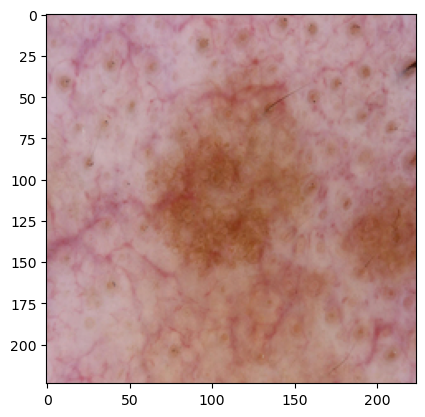

In [6]:
def readAndDecode(filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img,channels = COLOR_CHANNELS)
    img = tf.image.convert_image_dtype(img,tf.float32)
    return img.numpy()
def show_img(filename):
    img = readAndDecode(filename)
    plt.imshow(img)
    print(img.shape)
os.chdir(maliciousCellsPath)
show_img('1001.jpg')
# print(os.path.join(os.getcwd(),'1001.jpg'))


/Users/halabkhidhr/Documents/machineLearning/skinProject/dataset/train/malignant
(224, 224, 3)


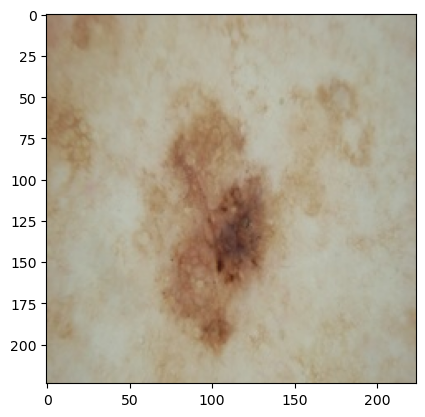

In [7]:
os.chdir(maliciousCellsPath)
print(os.getcwd())
show_img('10.jpg')

# apppending each image with its label as an array to the correspendant category of the validation set:

In [8]:
os.chdir(maliciousCellsPathVal)
maliciousCellsVal = np.array([[readAndDecode(image),MALICIOUS_CELLS_LABEL] for image in os.listdir(maliciousCellsPathVal) if image.endswith('.jpg')])
os.chdir(benignCellsPathVal)
benignCellsVal = np.array([[readAndDecode(image),BENIGN_CELLS_LABEL] for image in os.listdir(benignCellsPathVal) if image.endswith('.jpg') ])

/var/folders/8v/ttpmf4hj5hq5c49n7ldh1nx40000gn/T/ipykernel_61316/1785715515.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  maliciousCellsVal = np.array([[readAndDecode(image),MALICIOUS_CELLS_LABEL] for image in os.listdir(maliciousCellsPathVal) if image.endswith('.jpg')])
/var/folders/8v/ttpmf4hj5hq5c49n7ldh1nx40000gn/T/ipykernel_61316/1785715515.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  benignCellsVal = np.array([[readAndDecode(image),BENIGN_CELLS_LABEL] for image in os.listdir(benignCellsPathVal) if image.endswith('.jpg') ])


In [9]:
print(maliciousCellsVal.shape,benignCellsVal.shape)
print(len([image for image in os.listdir(maliciousCellsPathVal) if image.endswith('.jpg')]))
print(len([image for image in os.listdir(benignCellsPathVal) if image.endswith('.jpg')]))


(300, 2) (360, 2)
300
360


# apppending each image with its label as an array to the correspendant category of the training set:

In [10]:
os.chdir(benignCellsPath)
benignCells = np.array([[readAndDecode(image),BENIGN_CELLS_LABEL] for image in os.listdir(benignCellsPath) if image.endswith('.jpg')])
os.chdir(maliciousCellsPath)
maliciousCells = np.array([[readAndDecode(image),MALICIOUS_CELLS_LABEL] for image in os.listdir(maliciousCellsPath) if image.endswith('.jpg')])
print(benignCells.shape,maliciousCells.shape)


/var/folders/8v/ttpmf4hj5hq5c49n7ldh1nx40000gn/T/ipykernel_61316/2757545263.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  benignCells = np.array([[readAndDecode(image),BENIGN_CELLS_LABEL] for image in os.listdir(benignCellsPath) if image.endswith('.jpg')])


(1440, 2) (1197, 2)


/var/folders/8v/ttpmf4hj5hq5c49n7ldh1nx40000gn/T/ipykernel_61316/2757545263.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  maliciousCells = np.array([[readAndDecode(image),MALICIOUS_CELLS_LABEL] for image in os.listdir(maliciousCellsPath) if image.endswith('.jpg')])


In [11]:
pwd

'/Users/halabkhidhr/Documents/machineLearning/skinProject/dataset/train/malignant'

In [12]:
print(maliciousCells[0][0].shape)
maliciousCells.shape

(224, 224, 3)


(1197, 2)

# adding all the validation images with their labels to the validation set:

In [14]:
val_set = []
val_set = np.append(maliciousCellsVal,benignCellsVal,axis =0)
np.random.shuffle(val_set)
val_set.shape



(660, 2)

# Spliting X_test and Y_test

In [15]:
x_test = val_set[:,0]
y_test = val_set[:,1]
y_test  = y_test.astype('int8')
x_test = np.array(list(x_test))
x_test.shape

(660, 224, 224, 3)

# adding all images with their labels to the training set:

In [16]:
train_set = []
train_set= np.append(maliciousCells,benignCells,axis=0)
print(train_set.shape)
np.random.shuffle(train_set)



(2637, 2)


# Spliting X_train and Y_train:

In [ ]:
X_train = train_set[:,0]

Y_train = train_set[:,1]
Y_train  = Y_train.astype('int8')
X_train = np.array(list(X_train))
X_train.shape
x2 = [i for i in Y_train]
print(type(x2))
print(type(Y_train))
sns.countplot(x2)

# function to plot the changes of metrics at each epoch:

In [38]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

# defining the architecture of the model as "AlexNet" architecture:

In [40]:
model0 = tf.keras.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),
    # It would be best practice to convert the image from int [0,255] to float [-1,1]
    # format here but this model converges just as well without it.
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(NUM_HIDDEN),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(NUM_HIDDEN),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# defining the loss function , the optimizer and the metrics of the model:

In [41]:
model0.compile(
optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE ),
loss = 'BinaryCrossentropy',
metrics=['BinaryAccuracy','AUC']
)

# fitting the data into the model:

Epoch 1/40
528/528 [==============================] - 24s 44ms/step - loss: 0.6892 - binary_accuracy: 0.5461 - auc: 0.6515 - val_loss: 0.6888 - val_binary_accuracy: 0.5455 - val_auc: 0.6964
Epoch 2/40
528/528 [==============================] - 24s 46ms/step - loss: 0.6887 - binary_accuracy: 0.5461 - auc: 0.6667 - val_loss: 0.6883 - val_binary_accuracy: 0.5455 - val_auc: 0.6796
Epoch 3/40
528/528 [==============================] - 25s 47ms/step - loss: 0.6881 - binary_accuracy: 0.5461 - auc: 0.6747 - val_loss: 0.6878 - val_binary_accuracy: 0.5455 - val_auc: 0.7210
Epoch 4/40
528/528 [==============================] - 23s 44ms/step - loss: 0.6876 - binary_accuracy: 0.5461 - auc: 0.7116 - val_loss: 0.6873 - val_binary_accuracy: 0.5455 - val_auc: 0.7231
Epoch 5/40
528/528 [==============================] - 23s 43ms/step - loss: 0.6871 - binary_accuracy: 0.5461 - auc: 0.7153 - val_loss: 0.6868 - val_binary_accuracy: 0.5455 - val_auc: 0.7512
Epoch 6/40
528/528 [==============================

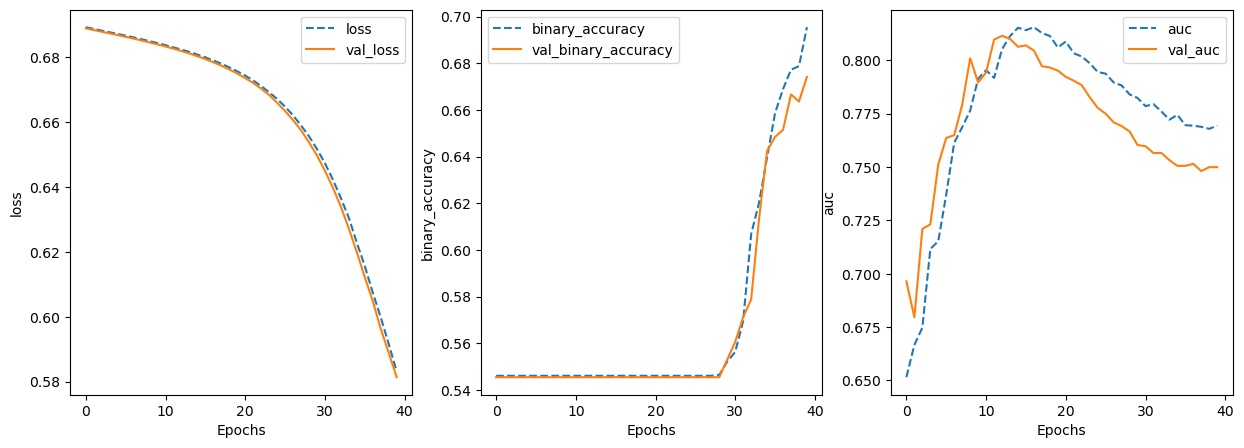

In [43]:
history = model0.fit(X_train,Y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test))
training_plot(['loss', 'binary_accuracy','auc'], history)

# calculating more important mesures of performances such as F1,recall,precision...

In [44]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [45]:
model_probabilities = model0.predict(x_test)
model_predictions = np.round(model_probabilities).astype(int)
confMat = confusion_matrix(y_test,model_predictions,labels=range(2))
print(confMat)
F1score = f1_score(y_test, model_predictions, labels=range(2), average='macro')
precision = precision_score(y_test, model_predictions, labels=range(2), average='macro')
recall = recall_score(y_test, model_predictions, labels=range(2), average='macro')
confMat = (confMat.T / confMat.sum(axis=1)).T # normalized


2023-01-19 01:00:42.888523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 102ms/step
[[256 104]
 [111 189]]


# function to display confusion matrix:

In [46]:
def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(CLASSES)))
    ax.set_xticklabels(CLASSES, fontdict={'fontsize': 13})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(CLASSES)))
    ax.set_yticklabels(CLASSES, fontdict={'fontsize': 13})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(1,0, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()

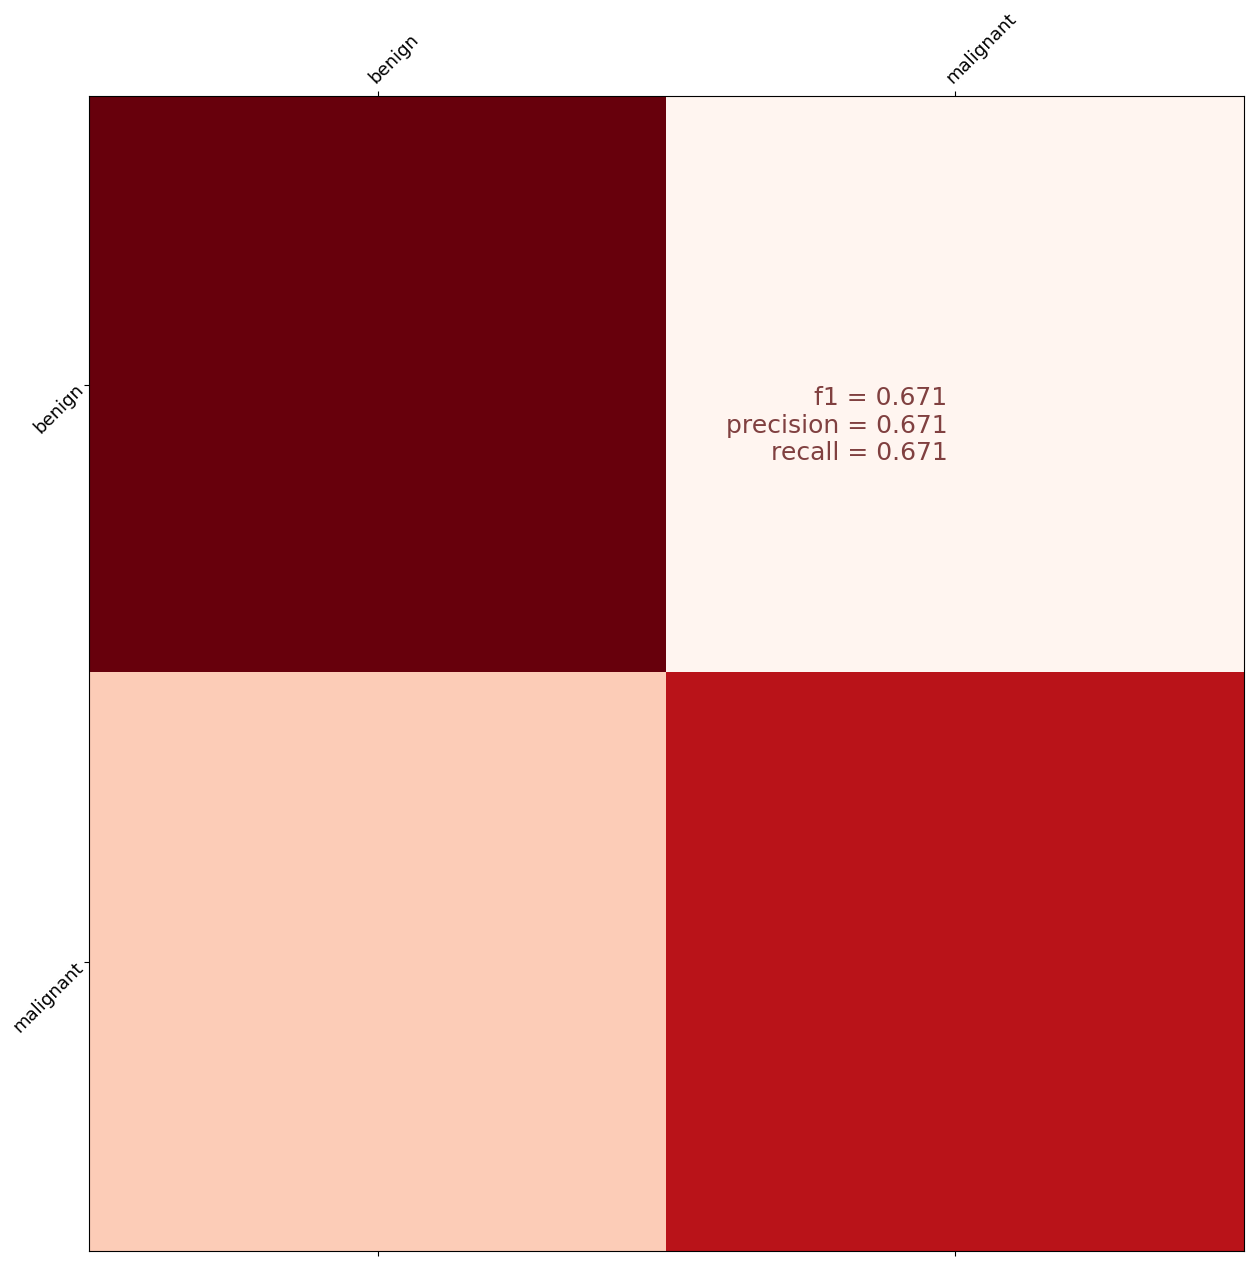

In [47]:
display_confusion_matrix(confMat,F1score,precision,recall)

# fixing overfitting:
In our model , we faced a severe overfitting case due to the complexity of our CNN model and the relatively small dataset , to solve this problem we will use the next techniques:
# L1 regularisation (Lasso Regression):
In order to decrease the model complexity we penalize high weights by adding “absolute value of magnitude” of coefficient as penalty term to the loss function.  
# L2 regularisation (Ridge Regression):
In order to decrease the model complexity we penalize high weights by adding “squared value of magnitude” of coefficient as penalty term to the loss function.  
# Dropout layer:
The idea behind this technique is to randomly drop some nodes that may be potentially  causing the overfitting or disturbing the results in the next layer,
this will allow to minimize the effect of the misleading nodes on the final results.
# Batch normalization:
when applying batch normalization , we reduce the output of each layer which is the input to next layer , which lead to lighter adjustments made by the weights in those layers , in other words a less complex model , this transformation does not affect the pattern hidden in the data , yet is so effective in facing overfitting , it is applied before the activation function.



In [18]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),
    # It would be best practice to convert the image from int [0,255] to float [-1,1]
    # format here but this model converges just as well without it.
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(NUM_HIDDEN,kernel_regularizer=tf.keras.regularizers.l1_l2(L1,L2)),
    tf.keras.layers.BatchNormalization(scale = False,center = False),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=DROPOUT_RATE),
    tf.keras.layers.Dense(NUM_HIDDEN,kernel_regularizer=tf.keras.regularizers.l1_l2(L1,L2)),
    tf.keras.layers.BatchNormalization(scale = False,center = False),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=DROPOUT_RATE),
    tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l1_l2(L1,L2))
])


In [19]:
model.compile(
optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE ),
loss = 'BinaryCrossentropy',
metrics=['BinaryAccuracy','AUC']

)

Epoch 1/40


2023-01-18 21:59:32.941509: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-18 21:59:33.360615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


528/528 [==============================] - ETA: 0s - loss: 0.5524 - binary_accuracy: 0.7217 - auc: 0.7920

2023-01-18 21:59:59.804182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


528/528 [==============================] - 29s 50ms/step - loss: 0.5524 - binary_accuracy: 0.7217 - auc: 0.7920 - val_loss: 0.6438 - val_binary_accuracy: 0.5818 - val_auc: 0.8494
Epoch 2/40
528/528 [==============================] - 25s 47ms/step - loss: 0.5118 - binary_accuracy: 0.7452 - auc: 0.8237 - val_loss: 0.6002 - val_binary_accuracy: 0.7242 - val_auc: 0.8657
Epoch 3/40
528/528 [==============================] - 25s 47ms/step - loss: 0.4914 - binary_accuracy: 0.7622 - auc: 0.8414 - val_loss: 0.4506 - val_binary_accuracy: 0.7621 - val_auc: 0.8669
Epoch 4/40
528/528 [==============================] - 24s 46ms/step - loss: 0.4702 - binary_accuracy: 0.7770 - auc: 0.8569 - val_loss: 0.4937 - val_binary_accuracy: 0.7970 - val_auc: 0.8550
Epoch 5/40
528/528 [==============================] - 24s 46ms/step - loss: 0.4812 - binary_accuracy: 0.7691 - auc: 0.8489 - val_loss: 0.4239 - val_binary_accuracy: 0.8182 - val_auc: 0.8890
Epoch 6/40
528/528 [==============================] - 24s 46m

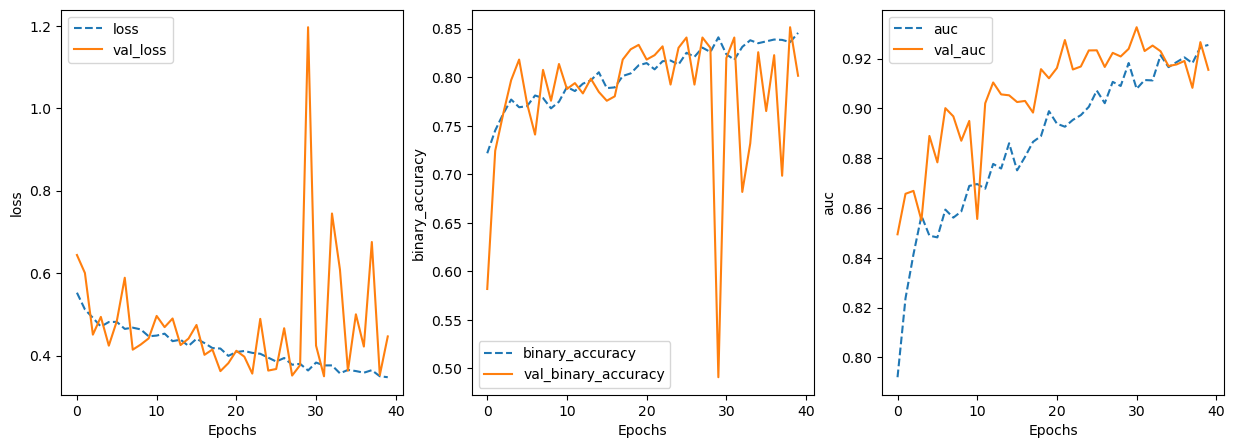

In [21]:
history = model.fit(X_train,Y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test))
training_plot(['loss', 'binary_accuracy','auc'], history)

In [23]:
model_probabilities = model.predict(x_test)
model_predictions = np.round(model_probabilities).astype(int)
confMat = confusion_matrix(y_test,model_predictions,labels=range(2))
print(confMat)
F1score = f1_score(y_test, model_predictions, labels=range(2), average='macro')
precision = precision_score(y_test, model_predictions, labels=range(2), average='macro')
recall = recall_score(y_test, model_predictions, labels=range(2), average='macro')
confMat = (confMat.T / confMat.sum(axis=1)).T # normalized


2023-01-18 22:15:23.085438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 57ms/step
[[242 118]
 [ 13 287]]


In [ ]:
model_probabilities = model.predict(x_test)
model_predictions = np.round(model_probabilities).astype(int)
confMat = confusion_matrix(y_test,model_predictions,labels=range(2))
print(confMat)
F1score = f1_score(y_test, model_predictions, labels=range(2), average='macro')
precision = precision_score(y_test, model_predictions, labels=range(2), average='macro')
recall = recall_score(y_test, model_predictions, labels=range(2), average='macro')
confMat = (confMat.T / confMat.sum(axis=1)).T # normalized


2023-01-18 22:15:23.085438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 57ms/step
[[242 118]
 [ 13 287]]


# confusion matrix after usage of anti-overfitting techniques:


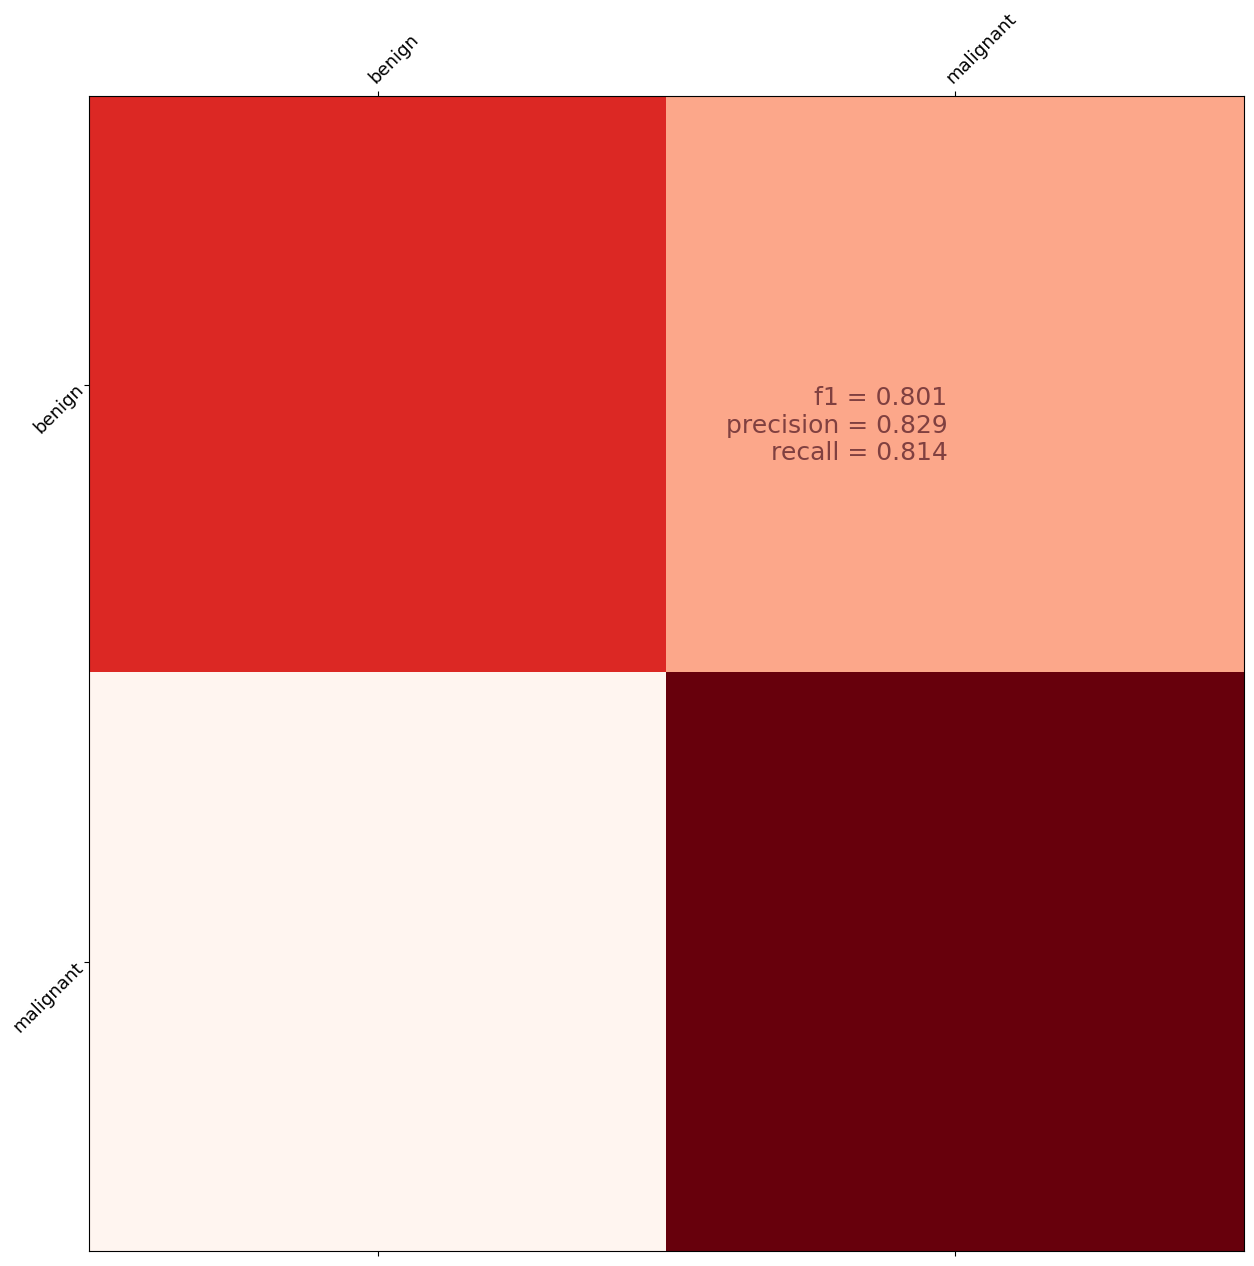

In [25]:
display_confusion_matrix(confMat,F1score,precision,recall)

# Hyper-parameters tuning:
We still can further increase the efficiency of our model by tuning the parameters  that define our model since they were randomly chosen , yet we don't know the best combination that fine-tune the model to its max, for that purpose we can use many techniques such as grid search previously used in the machine learning part, but we're going to introduce a new technique highly used for that purpose which is Bayesian optimization .

In [26]:
import kerastuner as kt

/var/folders/8v/ttpmf4hj5hq5c49n7ldh1nx40000gn/T/ipykernel_61316/1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [27]:
def build_model(hp):
  lrate = hp.Float('lrate', 1e-5, 1e-2, sampling='log')
  l1 = 0
  l2 = hp.Choice('l2', values=[0.0, 1e-1, 1e-2, 1e-3, 1e-4])
  num_hidden = hp.Int('num_hidden', 3096, 4096, 128)
  batch_size = hp.Int('batch_size',16,48,8)
  dropout = hp.Choice('dropout',values =[0.1,0.2,0.3,0.4])
  activation = hp.Choice('activation',values =['relu','tanh'])


  regularizer = tf.keras.regularizers.l1_l2(l1, l2)

  # NN with one hidden layers
  model = tf.keras.Sequential([
             tf.keras.Input(shape=X_train.shape[1:]),
            # It would be best practice to convert the image from int [0,255] to float [-1,1]
            # format here but this model converges just as well without it.
            tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
            tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
            tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

            tf.keras.layers.Flatten(),

          tf.keras.layers.Dense(num_hidden,kernel_regularizer=regularizer),
          tf.keras.layers.BatchNormalization(scale = False,center = False),
          tf.keras.layers.Activation(activation),
          tf.keras.layers.Dropout(rate=dropout),
          tf.keras.layers.Dense(num_hidden,kernel_regularizer=regularizer),
          tf.keras.layers.BatchNormalization(scale = False,center = False),
          tf.keras.layers.Activation(activation),
          tf.keras.layers.Dropout(rate=dropout),
          tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=regularizer)
                          ])
  model.compile(
                optimizer=tf.keras.optimizers.SGD(learning_rate=lrate),
                loss = 'BinaryCrossentropy',
                metrics=['BinaryAccuracy','AUC']
                )
  return model


# Bayesian optimization:
Bayesian optimization is a sequential design strategy for global optimization of black-box functions that does not assume any functional forms. It is usually employed to optimize expensive-to-evaluate functions which is the case for the metrics of performance of a model, they have no formulas and .

In [28]:
tuner = kt.BayesianOptimization(
        build_model,
objective=kt.Objective('val_binary_accuracy', 'max'), max_trials=20,
          #kt.Objective('val_loss', 'min')
          #kt.Objective('val_auc', 'max')
num_initial_points=2,
overwrite=True)
# objective=kt.Objective('val_loss', 'min'), max_trials=20,
# num_initial_points=2,
# overwrite=True)
tuner.search(
    X_train,Y_train, validation_data=(x_test,y_test),
    epochs=15,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)]
)

topN = 1
for x in range(topN):
  print(tuner.get_best_hyperparameters(topN)[x].values)
  print(tuner.get_best_models(topN)[x].summary())

Trial 20 Complete [00h 00m 37s]
val_binary_accuracy: 0.7666667103767395

Best val_binary_accuracy So Far: 0.8454545736312866
Total elapsed time: 00h 46m 22s
INFO:tensorflow:Oracle triggered exit
{'lrate': 0.00010337008758742293, 'l2': 0.0, 'num_hidden': 3992, 'batch_size': 16, 'dropout': 0.1, 'activation': 'relu'}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 256)       614656    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 384)       885120    
    

# Dynamic learning rate:
In simulation to how human brain works , where we show more focus on the beginning of the learning collecting the most interesting informations and showing lower attention on the details, dynamic learning rate work the same way, we start by a progressive learning rate,maintain it for a while then we slowly start dropping it :


In [29]:
LR_START = 0.00001
LR_MAX = 9.13835969801412e-05 
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 10
LR_SUSTAIN_EPOCHS = 10
LR_EXP_DECAY = .5

Learning rate schedule: 1e-05 to 9.14e-05 to 1e-05


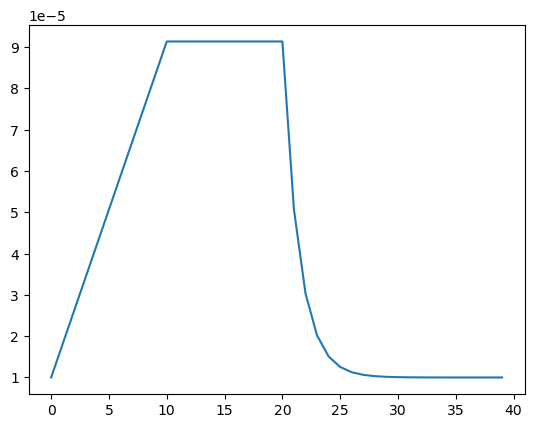

In [30]:
def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [32]:
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),
    # It would be best practice to convert the image from int [0,255] to float [-1,1]
    # format here but this model converges just as well without it.
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(NUM_HIDDEN,kernel_regularizer=tf.keras.regularizers.l1_l2(L1,L2)),
    tf.keras.layers.BatchNormalization(scale = False,center = False),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=DROPOUT_RATE),
    tf.keras.layers.Dense(NUM_HIDDEN,kernel_regularizer=tf.keras.regularizers.l1_l2(L1,L2)),
    tf.keras.layers.BatchNormalization(scale = False,center = False),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=DROPOUT_RATE),
    tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l1_l2(L1,L2))
])


In [33]:
model3.compile(
optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE ),
loss = 'BinaryCrossentropy',
metrics=['BinaryAccuracy','AUC']

)


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/40


2023-01-19 00:01:33.443102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


528/528 [==============================] - ETA: 0s - loss: 0.5712 - binary_accuracy: 0.7027 - auc: 0.7731

2023-01-19 00:01:58.380671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


528/528 [==============================] - 28s 50ms/step - loss: 0.5712 - binary_accuracy: 0.7027 - auc: 0.7731 - val_loss: 0.5876 - val_binary_accuracy: 0.7667 - val_auc: 0.8411 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.813835969801412e-05.
Epoch 2/40
528/528 [==============================] - 24s 45ms/step - loss: 0.5187 - binary_accuracy: 0.7418 - auc: 0.8204 - val_loss: 0.5348 - val_binary_accuracy: 0.7667 - val_auc: 0.8420 - lr: 1.8138e-05

Epoch 3: LearningRateScheduler setting learning rate to 2.627671939602824e-05.
Epoch 3/40
528/528 [==============================] - 23s 44ms/step - loss: 0.4931 - binary_accuracy: 0.7611 - auc: 0.8402 - val_loss: 0.4235 - val_binary_accuracy: 0.8030 - val_auc: 0.8896 - lr: 2.6277e-05

Epoch 4: LearningRateScheduler setting learning rate to 3.441507909404236e-05.
Epoch 4/40
528/528 [==============================] - 23s 44ms/step - loss: 0.4956 - binary_accuracy: 0.7565 - auc: 0.8350 - val_loss: 0.4107 - val_bi

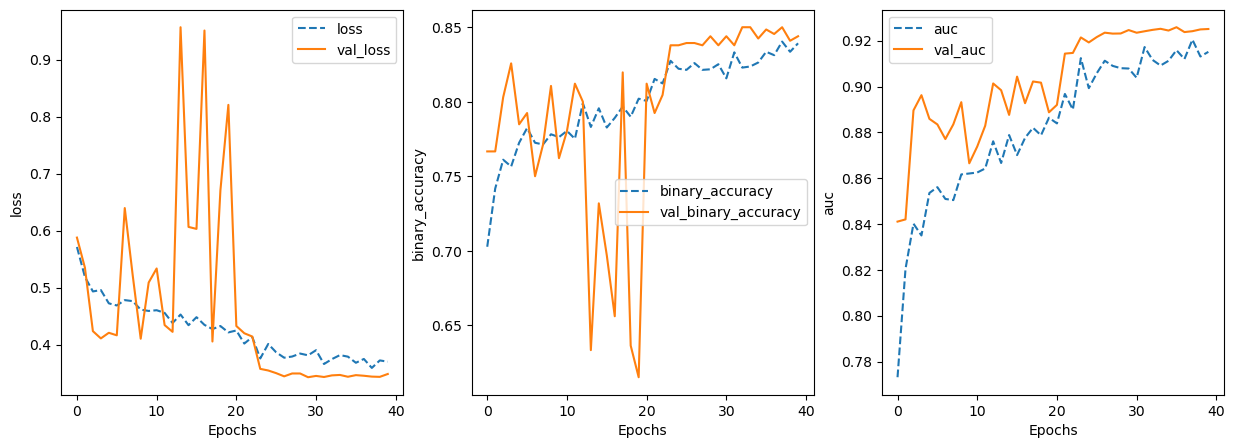

In [34]:
history = model3.fit(X_train,Y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),callbacks=[lr_callback])
training_plot(['loss', 'binary_accuracy','auc'], history)

# Calculating the metrics F1,precision,recall:

In [35]:
model_probabilities = model3.predict(x_test)
model_predictions = np.round(model_probabilities).astype(int)
confMat = confusion_matrix(y_test,model_predictions,labels=range(2))
print(confMat)
F1score = f1_score(y_test, model_predictions, labels=range(2), average='macro')
precision = precision_score(y_test, model_predictions, labels=range(2), average='macro')
recall = recall_score(y_test, model_predictions, labels=range(2), average='macro')
confMat = (confMat.T / confMat.sum(axis=1)).T # normalized

2023-01-19 00:30:20.620213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 65ms/step
[[316  44]
 [ 59 241]]


# Confusion matrix after adding dynamic learning rate:

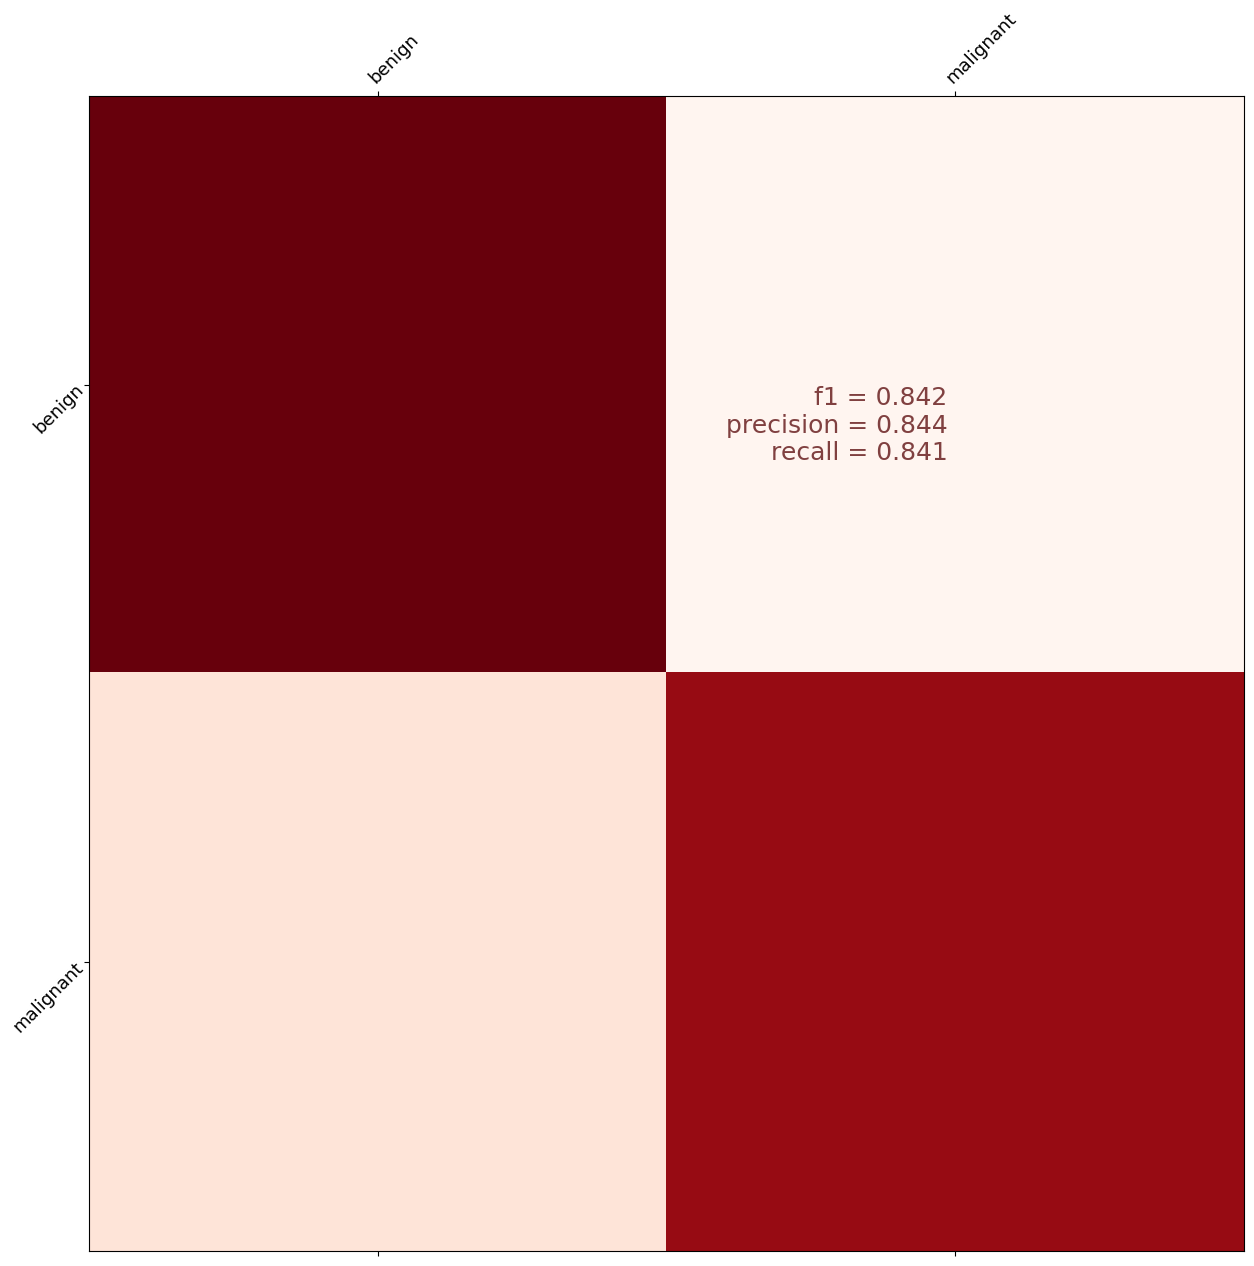

In [36]:
display_confusion_matrix(confMat,F1score,precision,recall)

# ROC curve:

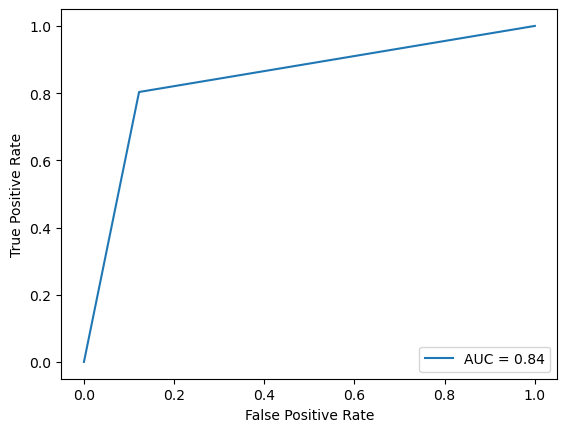

In [37]:
from sklearn.metrics import auc,roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, model_predictions)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [49]:
model_weights = model3.weights

In [50]:
!pip install pyyaml h5py

In [53]:
pwd

'/Users/halabkhidhr/Documents/machineLearning/skinProject/dataset/train/malignant'

In [55]:
checkpoint_path = "/Users/halabkhidhr/Documents/machineLearning/skinProject/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_dir)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

/Users/halabkhidhr/Documents/machineLearning/skinProject/training_1


In [56]:
model3.fit(X_train,Y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),callbacks=[lr_callback,cp_callback])



Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/40
528/528 [==============================] - ETA: 0s - loss: 0.3735 - binary_accuracy: 0.8343 - auc: 0.9126
Epoch 1: saving model to /Users/halabkhidhr/Documents/machineLearning/skinProject/training_1/cp.ckpt
528/528 [==============================] - 27s 50ms/step - loss: 0.3735 - binary_accuracy: 0.8343 - auc: 0.9126 - val_loss: 0.3371 - val_binary_accuracy: 0.8500 - val_auc: 0.9264 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.813835969801412e-05.
Epoch 2/40
527/528 [============================>.] - ETA: 0s - loss: 0.3507 - binary_accuracy: 0.8467 - auc: 0.9245
Epoch 2: saving model to /Users/halabkhidhr/Documents/machineLearning/skinProject/training_1/cp.ckpt
528/528 [==============================] - 27s 50ms/step - loss: 0.3510 - binary_accuracy: 0.8464 - auc: 0.9243 - val_loss: 0.3446 - val_binary_accuracy: 0.8515 - val_auc: 0.9242 - lr: 1.8138e-05

Epoch 3: LearningRateSchedu

In [1]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 350.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 426.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 357.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 378.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 382.2 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 649.9/649.9 kB 360.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 396.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 348.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 350.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 382.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 M